# Лабораторная работа №3. Синтез БИХ-фильтров




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
%matplotlib inline
# %matplotlib notebook
# %matplotlib widget

## Модуль 2. Метод билинейного *z*-преобразования

Основа метода: билинейная подстановка 
$$p=\frac{2}{\Delta t}\cdot \frac{z-1}{z+1}=\frac{2}{\Delta t}\cdot \frac{1-{{z}^{-1}}}{1+{{z}^{-1}}}$$
в передаточную функцию $H(p)$ аналогового фильтра-прототипа.

### Задача 2.1 Синтез фильтра нижних частот (ФНЧ)

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $f_д$, Гц  | 6000 | 6200 | 6400 |  6600 | 6800 | 7000 | 6200 | 6400 |  6600 | 6800 |
|  $f_1$, Гц | 800 | 860 | 920 | 980 | 1040 | 1100 | 860 | 920 | 980 | 1040 |
|  $f_2$, Гц | 1100 | 1170 | 1240 | 1310 | 1380 | 1450 |1170 | 1240 | 1310 | 1380 |
|  $a_{max}$, дБ | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 |0.4455 | 0.4455 | 0.4455 | 0.4455 |
|  $a_{min}$, дБ | 40 | 40 | 40 | 40 | 40 | 40 |40 | 40 | 40 | 40 |

 Получить коэффициенты разностного уравнения БИХ-фильтра нижних частот со следующими характеристиками:
* частота дискретизации $f_{д}$, 
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимальное допустимое затухание в полосе пропускания $a_{max}$,
* минимальное допустимое затухание в полосе задерживания $a_{min}$.

Воспользоваться методом билинейного z-преобразования для фильтров: 

1) Баттервота,

2) Чебышёва 1 рода,

3) Чебышёва 2 рода,

4) Золотарёва—Кауэра.

Привести графики АЧХ в линейном масштабе и в дБ. 

Из четырех получившихся результатов выбрать фильтр, обладающий наименьшим порядком $N$ и построить схему его реализации в виде каскада биквадратных блоков. Для биквадратных блоков выбрать прямую каноническую реализацию. 


In [3]:
# Опредление набора параметров
fs = 6600 # частота дискретизации
f1 = 980 # граничная частота полосы пропускания
f2 = 1310 # граничная частота полосы задерживания
gpass=0.4455 # максимальное допустимое затухание в полосе пропускания в дБ
gstop=40 # минимальное допустимое затухание в полосе задерживанияd в дБ
wp, ws = f1, f2
from dataclasses import dataclass
from typing import Any, Dict

@dataclass
class FiltInfo:
    alpha: Any
    beta: Any
    Wn: float

ab: Dict[str, FiltInfo] = {}

**Библиотечные функции синтеза** 

In [4]:
# Синтез на основе фильтра Баттервота
N, Wn = signal.buttord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
name = "Butter"
be, al = signal.butter(N, Wn=Wn, btype='lowpass', analog=False, output='ba', fs=fs)
ab[name] = FiltInfo(al, be, Wn)
print("Порядок фильтра ", N)
print("Частота среза %.2f Гц" % Wn)
ab[name]

Порядок фильтра  17
Частота среза 1036.30 Гц


FiltInfo(alpha=array([ 1.00000000e+00, -6.31592071e+00,  2.04677860e+01, -4.40911610e+01,
        6.98653005e+01, -8.57246127e+01,  8.38604476e+01, -6.65185868e+01,
        4.31654806e+01, -2.29834374e+01,  1.00181350e+01, -3.54765522e+00,
        1.00649678e+00, -2.23651580e-01,  3.75427697e-02, -4.48114549e-03,
        3.39246852e-04, -1.22542219e-05]), beta=array([9.16256218e-08, 1.55763557e-06, 1.24610846e-05, 6.23054228e-05,
       2.18068980e-04, 5.66979347e-04, 1.13395869e-03, 1.78193509e-03,
       2.22741886e-03, 2.22741886e-03, 1.78193509e-03, 1.13395869e-03,
       5.66979347e-04, 2.18068980e-04, 6.23054228e-05, 1.24610846e-05,
       1.55763557e-06, 9.16256218e-08]), Wn=1036.2986491018805)

In [5]:
# Синтез на основе фильтра Чебышёва 1 рода
N, Wn = signal.cheb1ord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
name = "Cheb1"
be, al = signal.cheby1(N=N, rp=gpass, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
ab[name] = FiltInfo(al, be, Wn)
print("Порядок фильтра ", N)
print("Частота среза %.2f Гц" % Wn)
ab[name]

Порядок фильтра  8
Частота среза 980.00 Гц


FiltInfo(alpha=array([  1.        ,  -5.3453897 ,  13.73043036, -21.77794013,
        23.14946499, -16.81832168,   8.14251582,  -2.40332314,
         0.3321504 ]), beta=array([3.55765378e-05, 2.84612302e-04, 9.96143058e-04, 1.99228612e-03,
       2.49035764e-03, 1.99228612e-03, 9.96143058e-04, 2.84612302e-04,
       3.55765378e-05]), Wn=980.0000000000001)

In [6]:
# Синтез на основе фильтра Чебышёва 2 рода
N, Wn = signal.cheb2ord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
name = "Cheb2"
be, al = signal.cheby2(N=N, rs=gstop, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
ab[name] = FiltInfo(al, be, Wn)
print("Порядок фильтра ", N)
print("Частота среза %.2f Гц" % Wn)
ab[name]

Порядок фильтра  8
Частота среза 1246.03 Гц


FiltInfo(alpha=array([ 1.00000000e+00, -2.08397680e+00,  3.00539937e+00, -2.44022556e+00,
        1.52315268e+00, -5.66125633e-01,  1.69260312e-01, -2.05066437e-02,
        2.86972068e-03]), beta=array([0.03295931, 0.03105949, 0.08566764, 0.08937358, 0.11172741,
       0.08937358, 0.08566764, 0.03105949, 0.03295931]), Wn=1246.034229861111)

In [7]:
# Синтез на основе фильтра Золотарёва—Кауэра.
N, Wn = signal.ellipord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
name = "Ellip"
be, al = signal.ellip(N=N, rp=gpass, rs=gstop, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
ab[name] = FiltInfo(al, be, Wn)
print("Порядок фильтра ", N)
print("Частота среза %.2f Гц" % Wn)
ab[name]

Порядок фильтра  5
Частота среза 980.00 Гц


FiltInfo(alpha=array([ 1.        , -2.86715026,  4.1490669 , -3.38832222,  1.57536063,
       -0.32908608]), beta=array([0.0297655 , 0.0041836 , 0.03598539, 0.03598539, 0.0041836 ,
       0.0297655 ]), Wn=980.0000000000001)

**Пример построения графика**

In [8]:
# Пределы в линейном масштабе
delta_pass = 1- 10**(-gpass/20)
delta_stop = 10**(-gstop/20)
delta_pass, delta_stop

(0.04999694912604835, 0.01)

In [9]:
def mag_resp_plot(filtInfo, name, dB=False):
    alpha, beta, Wn = filtInfo.alpha, filtInfo.beta, filtInfo.Wn
    plt.figure(figsize=[10, 3], dpi=100)
    f_Nyquist=fs/2
    f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
    if dB:
        plt.plot(f, 20*np.log10(abs(H)))
        plt.ylabel("дБ")
        plt.plot([-f_Nyquist,-ws], [-gstop, -gstop], '--r')
        plt.plot([f_Nyquist,ws], [-gstop, -gstop], '--r')
        plt.plot([-wp,wp], [-gpass, -gpass], '--r')
        plt.ylim([-gstop*2, 5])
    else:
        plt.plot(f, np.abs(H))
        plt.ylabel("$|H(f)|$")
        plt.fill([-wp,-wp, wp, wp], [0, 1-delta_pass, 1-delta_pass, 0], '0.9', lw=0)
        plt.fill([-f_Nyquist,-f_Nyquist, -ws, -ws], [delta_stop, 1, 1, delta_stop], '0.9', lw=0)
        plt.fill([f_Nyquist, f_Nyquist, ws, ws], [delta_stop, 1, 1, delta_stop], '0.9', lw=0)
        plt.fill([f_Nyquist, f_Nyquist, ws, ws], [delta_stop, 1, 1, delta_stop], '0.9', lw=0)
        plt.fill([-f_Nyquist,-f_Nyquist, f_Nyquist, f_Nyquist], [1.1, 1, 1, 1.1], '0.9', lw=0)
        plt.fill([-f_Nyquist,-f_Nyquist, f_Nyquist, f_Nyquist], [1.1, 1, 1, 1.1], '0.9', lw=0)
    plt.xlim([-fs/2, fs/2])
    plt.xticks([-fs/2, -Wn, 0, wp, ws, fs/2])
    plt.title(name)
    plt.xlabel("$f$, Гц")
    plt.grid()
    plt.tight_layout()
    plt.show()

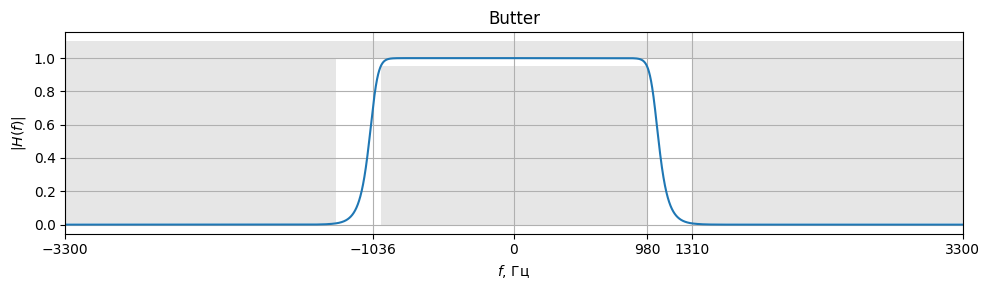

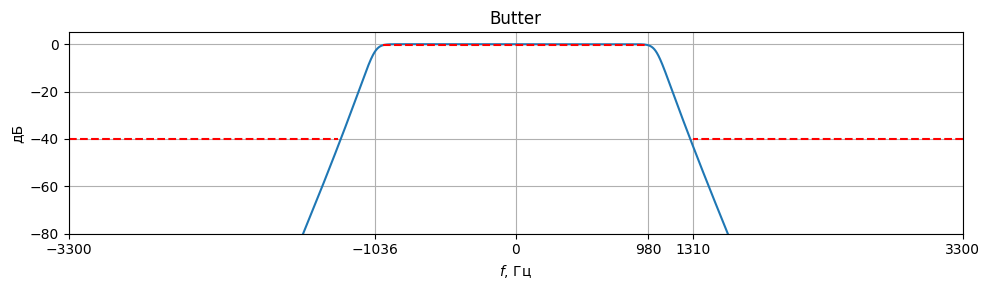

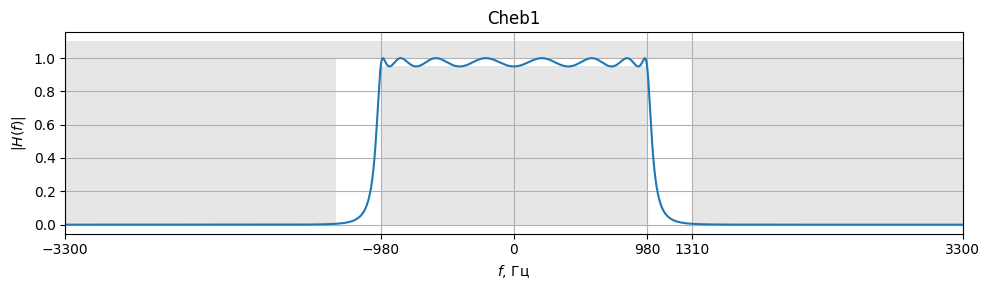

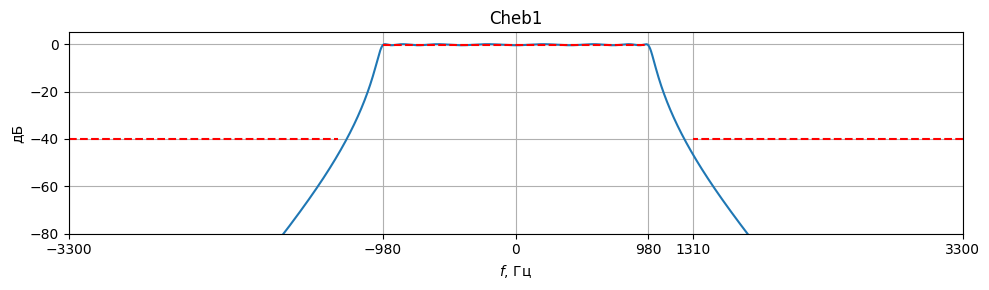

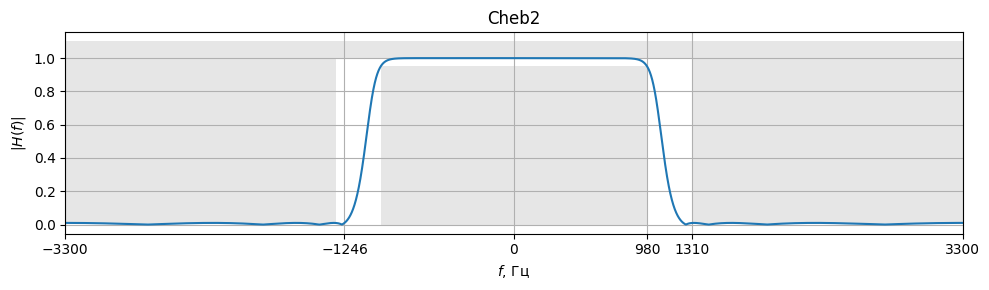

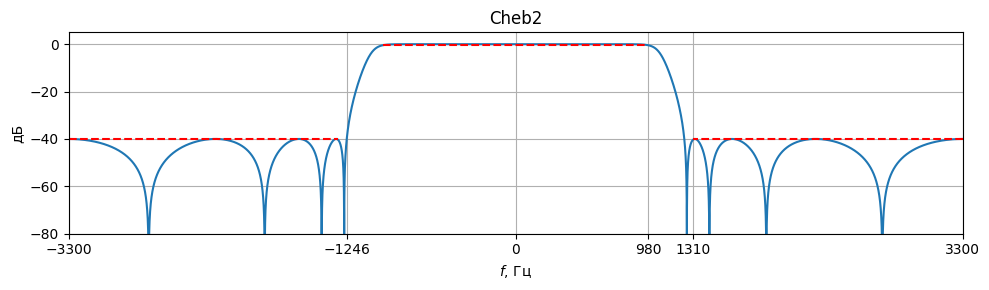

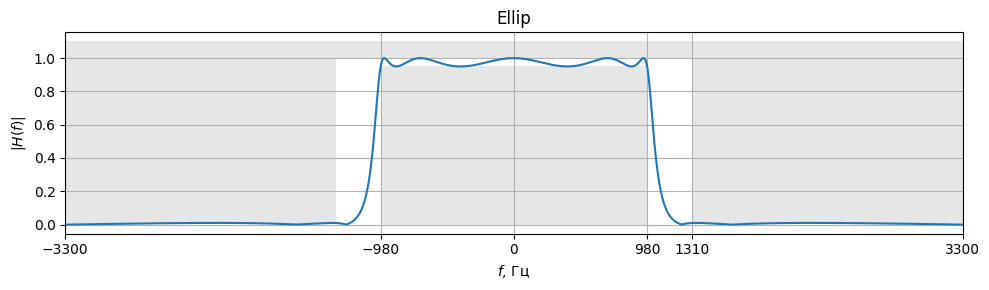

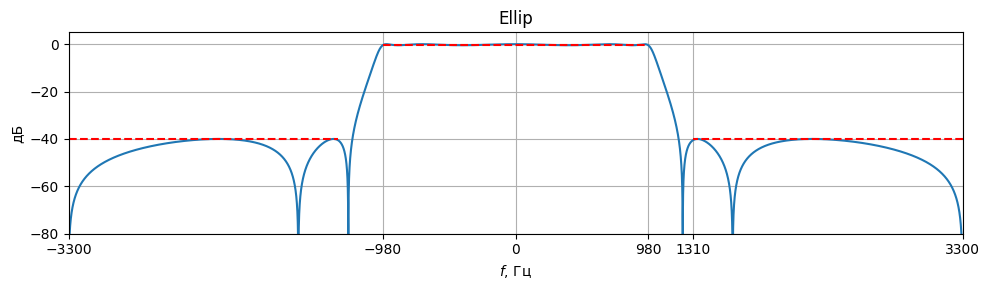

In [10]:
for name, info in ab.items():
    mag_resp_plot(info, name, dB=False)
    mag_resp_plot(info, name, dB=True)


**Представление в виде каскада биквадратных блоков** (Second-order sections  (SOS) representation)
$$ [\beta_0, \beta_1, \beta_2, 1, \alpha_1, \alpha_2]$$
$$ [a_0, a_1, a_2, 1, -b_1, -b_2]$$

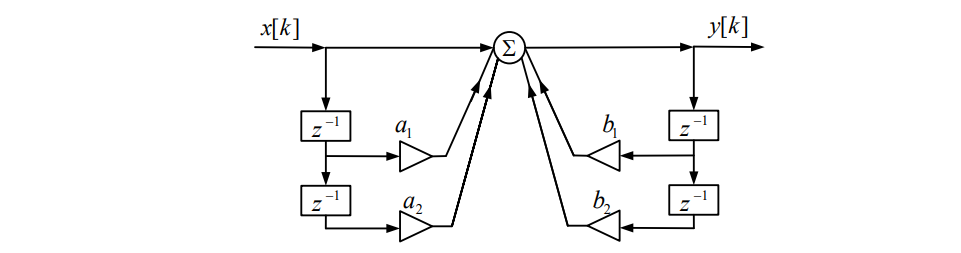

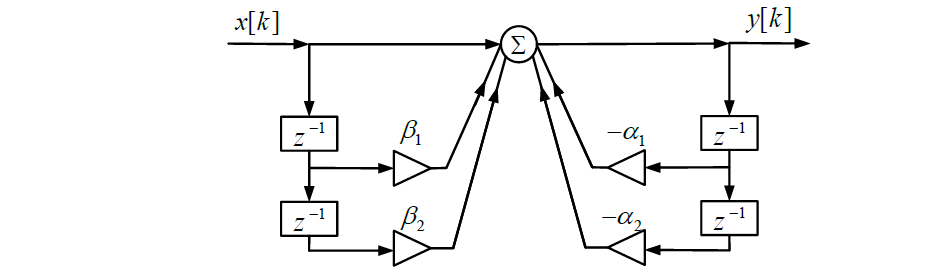

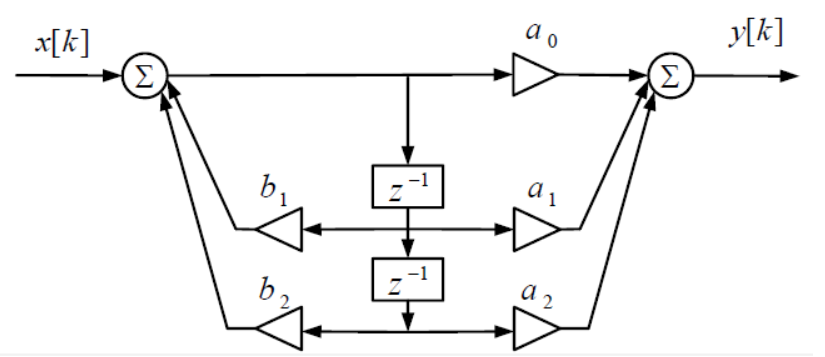

In [11]:
lowest = ab["Ellip"]
alpha, beta = lowest.alpha, lowest.beta
signal.tf2sos(beta, alpha)

array([[ 0.0297655 ,  0.0297655 ,  0.        ,  1.        , -0.60798331,
         0.        ],
       [ 1.        , -0.08876736,  1.        ,  1.        , -1.15155515,
         0.60419745],
       [ 1.        , -0.77068078,  1.        ,  1.        , -1.10761179,
         0.89585758]])

### Пример к задаче 2.2 Синтез аналога однокаскадного RC-фильтра

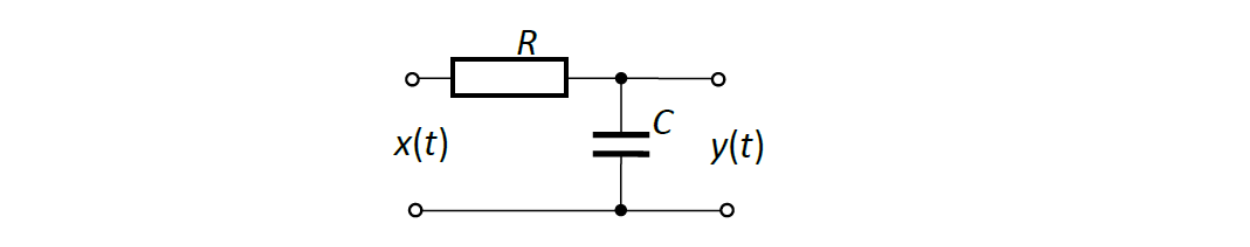

Для $RC-$цепи справедливо уравнение Кирхгофа
$$i\left( t \right)\text{=} C\frac{dy}{dt}\text{ }\text{,   }RC\frac{dy}{dt}\text{+ }y\left( t \right)=x\left( t \right),$$
где $x(t)$, $y(t)$ – напряжения на входе и выходе цепи соответственно. Пусть в начальный момент времени, $y(0)=0$. Лапласов образ этого уравнения
$$RCpY(p)+Y(p)=X(p).$$
Тогда передаточная функция аналогового фильтра имеет вид
$${{H}_{a}}(p)=\frac{Y(p)}{X(p)}=\frac{1}{1+RCp}=\frac{1}{RC\left( p+\frac{1}{RC} \right)}.$$

$$p=\frac{2}{\Delta t}\cdot \frac{z-1}{z+1}=\frac{2}{\Delta t}\cdot \frac{1-{{z}^{-1}}}{1+{{z}^{-1}}}$$

$$H(z)=\frac{1}{1+\frac{2RC}{\Delta t}\frac{1-{{z}^{-1}}}{1+{{z}^{-1}}}}=\frac{1+{{z}^{-1}}}{1+{{z}^{-1}}+\frac{2RC}{\Delta t}-\frac{2RC}{\Delta t}{{z}^{-1}}}=\frac{1+{{z}^{-1}}}{\left( 1+\frac{2RC}{\Delta t} \right)+{{z}^{-1}}\left( 1-\frac{2RC}{\Delta t} \right)}$$

In [12]:
# Аналоговый фильтр
RC=2*1e-4
lti_RC=signal.lti([1], [RC, 1])
lti_RC

TransferFunctionContinuous(
array([5000.]),
array([1.e+00, 5.e+03]),
dt: None
)

In [13]:
# Цифровой фильтр
dt=RC/8
beta=[1, 1]
alpha=[(1+2*RC/dt), (1-2*RC/dt)]
dlti_RC=signal.dlti(beta, alpha, dt=dt)
dlti_RC

TransferFunctionDiscrete(
array([0.05882353, 0.05882353]),
array([ 1.        , -0.88235294]),
dt: 2.5e-05
)

In [14]:
# пример расчета функцией signal.bilinear
signal.bilinear([1], [RC, 1], fs=1/dt)

(array([0.05882353, 0.05882353]), array([ 1.        , -0.88235294]))

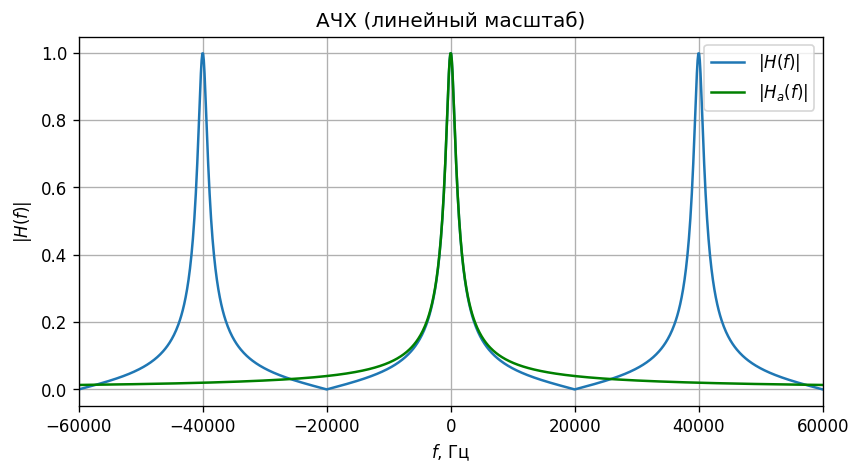

In [15]:
w_a, H_a=signal.freqresp(lti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024)/dt)
theta_d, H_d=signal.dfreqresp(dlti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024))

plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), abs(H_d), label="$|H(f)|$")
plt.plot(w_a/(2*np.pi), abs(H_a), "g", label="$|H_a(f)|$")
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-1.5/dt, 1.5/dt])
plt.legend(loc='upper right')
plt.grid()

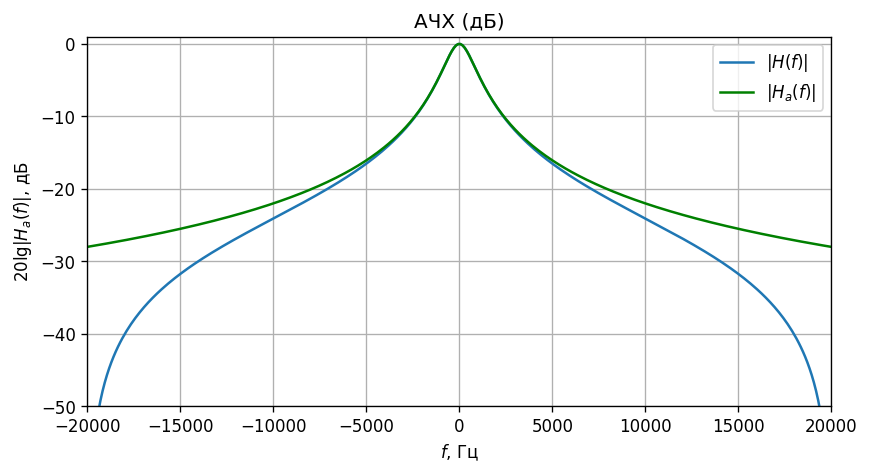

In [16]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), 20*np.log10(abs(H_d)), label="$|H(f)|$")
plt.plot(w_a/(2*np.pi), 20*np.log10(abs(H_a)), "g", label="$|H_a(f)|$")
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (дБ)")
plt.xlim([-0.5/dt, 0.5/dt])
plt.ylim([-50, 1])
plt.legend(loc='upper right')
plt.grid()

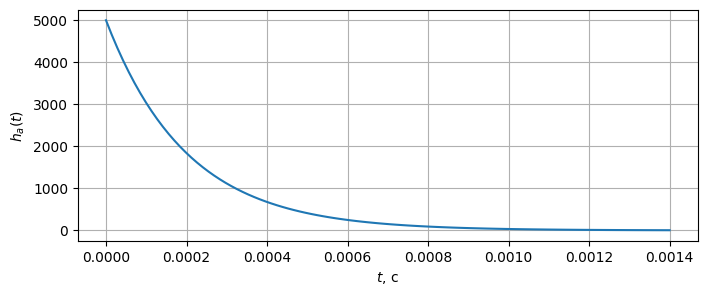

In [17]:
t, h_a = signal.impulse(lti_RC) # импульсная характеристика аналогового фильтра

plt.figure(figsize=[8, 3], dpi=100)
plt.plot(t, h_a)
plt.xlabel("$t$, c")
plt.ylabel("$h_a(t)$")
plt.grid()

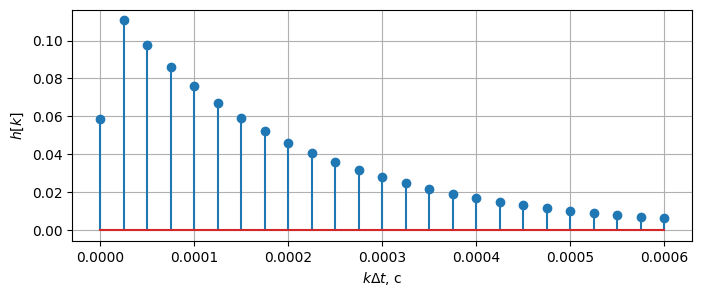

In [18]:
plt.figure(figsize=[8, 3], dpi=100)
t, h = signal.dimpulse(dlti_RC, n=25)
plt.stem(t, np.squeeze(h))
plt.xlabel("$k\Delta t$, c")
plt.ylabel("$h[k]$")
plt.grid()

### Задача 2.2 Синтез аналога двухкаскадного RC-фильтра

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом билинейного *z*-преобразования.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

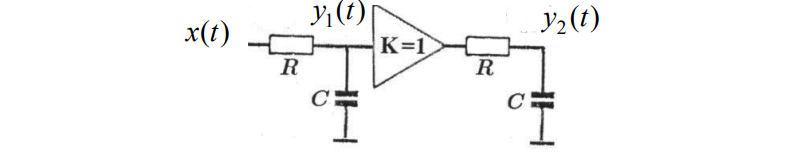

На рисунке между двумя  RC-цепочками  имеется  развязывающий повторитель, у которого большое входное и малое выходное сопротивление.  Это необходимо для устранения влияния цепочек друг на друга.

* Уравнение для одного RC-каскада:
$$RC\frac{dy}{dt}+{{y}_{1}}(t)=x(t)$$
Пусть ${{y}_{1}}(0)=0$. 

* Тогда преобразование Лапласа для него
$$RCp{{Y}_{1}}(p)+{{Y}_{1}}(p)=X(p)$$
* Передаточная функция
$${{H}_{1}}(p)=\frac{{{Y}_{1}}(p)}{X(p)}=\frac{1}{1+RCp}.$$

* Для двух последовательно соединенных RC-фильтров первого порядка
$${{H}_{2}}(p)={{H}_{1}}(p){{H}_{1}}(p)=\frac{1}{{{(RC)}^{2}}{{p}^{2}}+2RCp+1}.$$
Передаточную функцию $H(z)$ для соответствующего цифрового фильтра можно получить методом билинейного $z-$преобразования.
* Получаем передаточную функцию цифрового фильтра $H(z)$.
$$H(z)=\frac{1}{{{(RC)}^{2}}{{\left( \frac{2}{\Delta t}\frac{1-{{z}^{-1}}}{1+{{z}^{-1}}} \right)}^{2}}+2RC\left( \frac{2}{\Delta t}\frac{1-{{z}^{-1}}}{1+{{z}^{-1}}} \right)+1}$$
Преобразуем:
$$\begin{align}
  & H(z)=\frac{1+2{{z}^{-1}}+{{z}^{-2}}}{4{{(RC/\Delta t)}^{2}}(1-2{{z}^{-1}}+{{z}^{-2}})+4(RC/\Delta t)(1-{{z}^{-2}})+(1+2{{z}^{-1}}+{{z}^{-2}})} \\ 
\end{align}$$

Обозначим $\alpha =RC/\Delta t=RC{{f}_{\text{}}}$
$$H(z)=\frac{1+2{{z}^{-1}}+{{z}^{-2}}}{(4{{\alpha }^{2}}+4\alpha +1)+(2-8{{\alpha }^{2}}){{z}^{-1}}+(4{{\alpha }^{2}}-4\alpha +1){{z}^{-2}}}$$


In [19]:
# Аналоговый фильтр
RC=2*1e-4
lti_RC=signal.lti([1], [RC**2, 2 * RC, 1])
lti_RC

TransferFunctionContinuous(
array([25000000.]),
array([1.0e+00, 1.0e+04, 2.5e+07]),
dt: None
)

In [20]:
# Цифровой фильтр
dt=RC/4
al = RC / dt
beta=[1, 2, 1]
alpha=[4 * al**2 + 4 * al + 1, 2 - 8 * al**2, 4 * al**2 - 4 * al + 1]
dlti_RC=signal.dlti(beta, alpha, dt=dt)
dlti_RC

TransferFunctionDiscrete(
array([0.01234568, 0.02469136, 0.01234568]),
array([ 1.        , -1.55555556,  0.60493827]),
dt: 5e-05
)

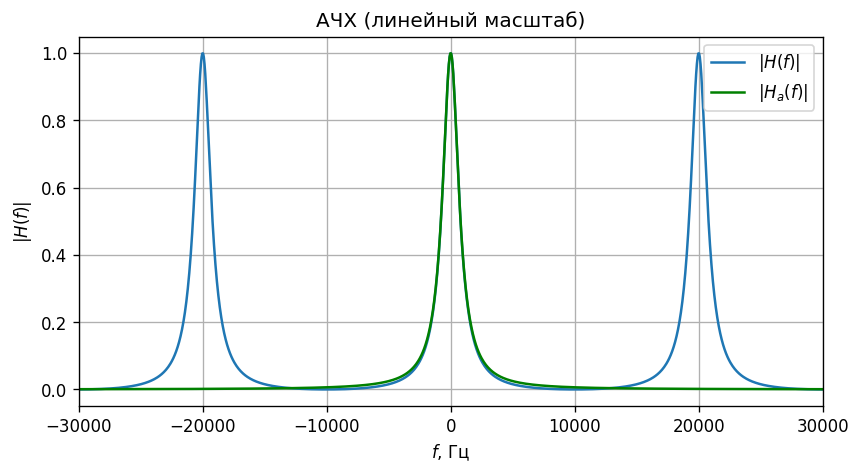

In [21]:
w_a, H_a=signal.freqresp(lti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024)/dt)
theta_d, H_d=signal.dfreqresp(dlti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024))

plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), abs(H_d), label="$|H(f)|$")
plt.plot(w_a/(2*np.pi), abs(H_a), "g", label="$|H_a(f)|$")
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-1.5/dt, 1.5/dt])
plt.legend(loc='upper right')
plt.grid()

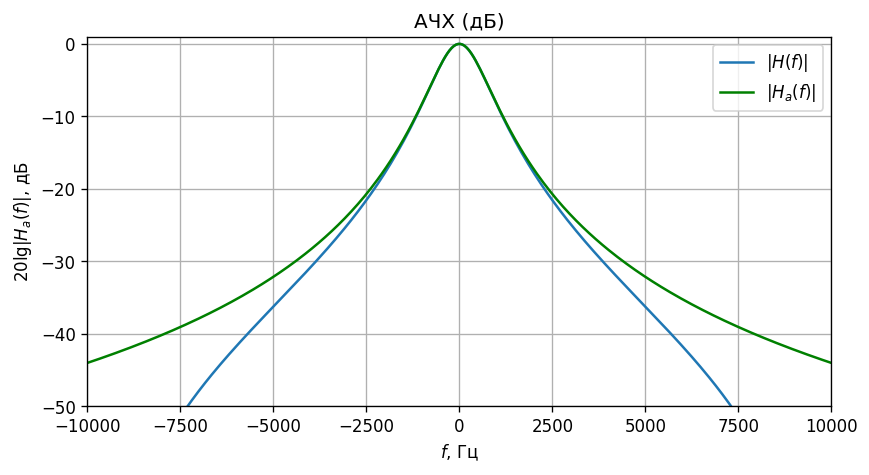

In [22]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), 20*np.log10(abs(H_d)), label="$|H(f)|$")
plt.plot(w_a/(2*np.pi), 20*np.log10(abs(H_a)), "g", label="$|H_a(f)|$")
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (дБ)")
plt.xlim([-0.5/dt, 0.5/dt])
plt.ylim([-50, 1])
plt.legend(loc='upper right')
plt.grid()

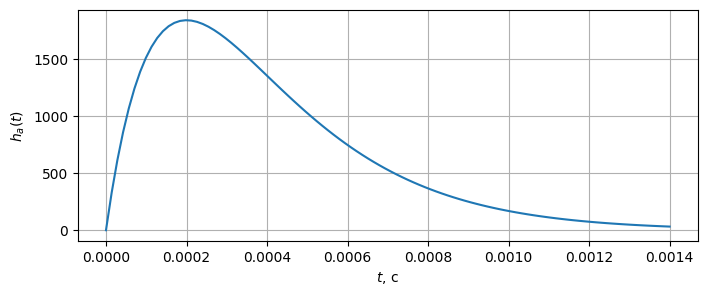

In [23]:
t, h_a = signal.impulse(lti_RC) # импульсная характеристика аналогового фильтра

plt.figure(figsize=[8, 3], dpi=100)
plt.plot(t, h_a)
plt.xlabel("$t$, c")
plt.ylabel("$h_a(t)$")
plt.grid()

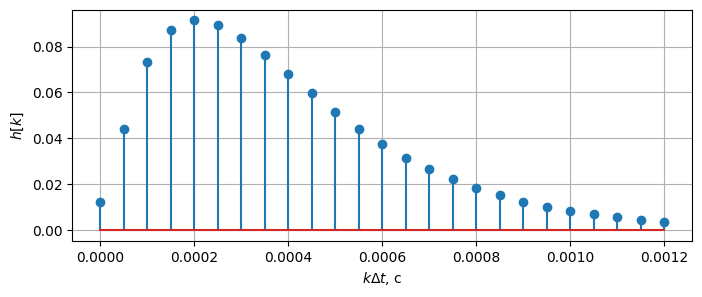

In [24]:
plt.figure(figsize=[8, 3], dpi=100)
t, h = signal.dimpulse(dlti_RC, n=25)
plt.stem(t, np.squeeze(h))
plt.xlabel("$k\Delta t$, c")
plt.ylabel("$h[k]$")
plt.grid()